<a href="https://colab.research.google.com/github/MuskanSharma-22CSU123/LabManual_DeepLearning/blob/main/DL_Exp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
# pip install -r requirements.txt
!pip install yfinance


In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching Data from yahoo finance

In [ ]:
START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TATAMOTORS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2012-01-02,175.647980,176.698326,170.730405,172.783369,10175802
1,2012-01-03,185.196655,186.008287,177.796429,177.844172,15868503
2,2012-01-04,192.119446,193.360764,184.289517,185.101163,22752471
3,2012-01-05,192.978821,196.464090,191.164571,191.880731,21640778
4,2012-01-06,194.411118,195.747937,189.541286,190.973591,13553191


In [ ]:
df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)

<ipython-input-16-b762d74b983a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)


In [ ]:
df.head()

Price,Close
Ticker,TATAMOTORS.NS
0,175.647980
1,185.196655
2,192.119446
3,192.978821
4,194.411118


# Plotting Closing Price

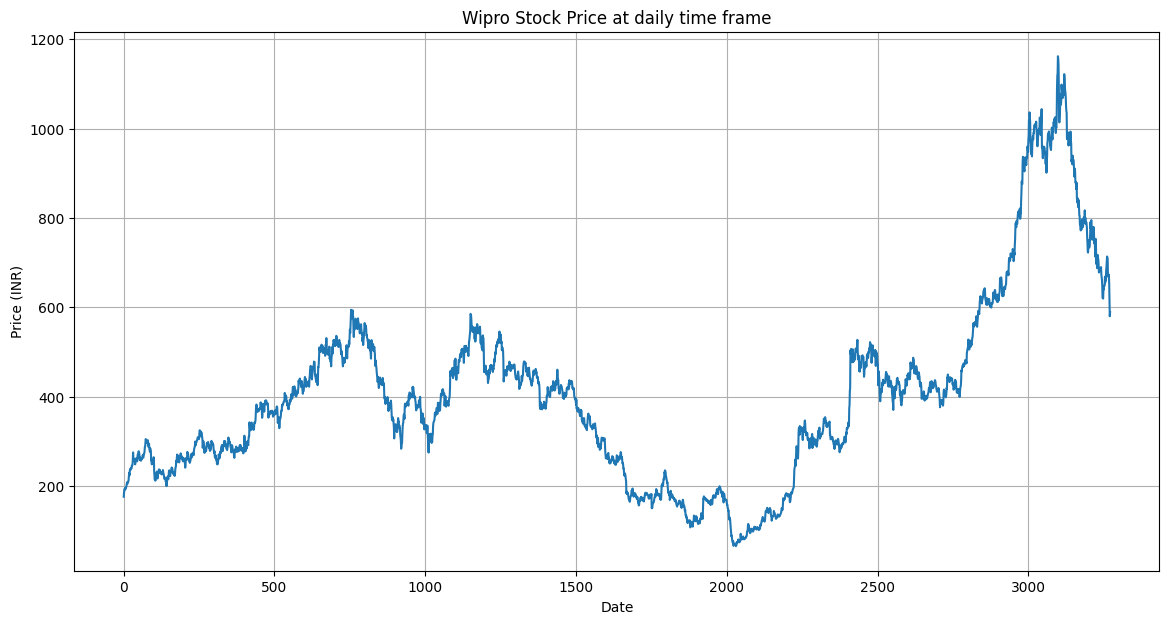

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title("Wipro Stock Price at daily time frame")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close
Ticker,TATAMOTORS.NS
0,175.647980
1,185.196655
2,192.119446
3,192.978821
4,194.411118
...,...
3267,671.900024
3268,653.950012
3269,613.849976


In [ ]:
df.shape

(3272, 1)

# Dataset Spliting for training (70%) and testing (30%)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2012-01-02,175.647980,176.698326,170.730405,172.783369,10175802
1,2012-01-03,185.196655,186.008287,177.796429,177.844172,15868503
2,2012-01-04,192.119446,193.360764,184.289517,185.101163,22752471
3,2012-01-05,192.978821,196.464090,191.164571,191.880731,21640778
4,2012-01-06,194.411118,195.747937,189.541286,190.973591,13553191
...,...,...,...,...,...,...
3267,2025-04-02,671.900024,675.349976,662.099976,674.950012,8025225
3268,2025-04-03,653.950012,669.000000,652.500000,660.000000,13473832
3269,2025-04-04,613.849976,650.000000,610.000000,650.000000,26621179


In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])
print(data.shape)
print(train.shape)
print(test.shape)

(3272, 6)
(2290, 6)
(982, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2012-01-02,175.647980,176.698326,170.730405,172.783369,10175802
1,2012-01-03,185.196655,186.008287,177.796429,177.844172,15868503
2,2012-01-04,192.119446,193.360764,184.289517,185.101163,22752471
3,2012-01-05,192.978821,196.464090,191.164571,191.880731,21640778
4,2012-01-06,194.411118,195.747937,189.541286,190.973591,13553191


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
2290,2021-04-22,292.731476,300.632406,290.396009,292.184884,61022978
2291,2021-04-23,292.184875,298.147832,288.706484,289.203397,58158986
2292,2021-04-26,293.576233,297.154013,292.781184,295.166361,30583139
2293,2021-04-27,299.638580,300.632406,293.278099,293.874401,35040532
2294,2021-04-28,304.011414,307.589194,301.129324,301.626237,44668126


# Dataset normalization by using MinMax scaler
---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
test

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
2290,2021-04-22,292.731476,300.632406,290.396009,292.184884,61022978
2291,2021-04-23,292.184875,298.147832,288.706484,289.203397,58158986
2292,2021-04-26,293.576233,297.154013,292.781184,295.166361,30583139
2293,2021-04-27,299.638580,300.632406,293.278099,293.874401,35040532
2294,2021-04-28,304.011414,307.589194,301.129324,301.626237,44668126
...,...,...,...,...,...,...
3267,2025-04-02,671.900024,675.349976,662.099976,674.950012,8025225
3268,2025-04-03,653.950012,669.000000,652.500000,660.000000,13473832
3269,2025-04-04,613.849976,650.000000,610.000000,650.000000,26621179


In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.20124266],
       [0.21078818],
       [0.22447609],
       ...,
       [0.44145011],
       [0.42832846],
       [0.45213493]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2190, 100, 1)

#  LSTM Model

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

# First LSTM layer with more units and higher dropout rate
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))  # Higher dropout for better regularization

# Second LSTM layer with more units and higher dropout rate
model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Slightly higher dropout rate

# Third LSTM layer with more units and dropout
model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Dropout increased further to prevent overfitting

# Fourth LSTM layer with more units
model.add(LSTM(units=250, activation='relu'))
model.add(Dropout(0.5))  # Same dropout rate for the last layer

# Output layer
model.add(Dense(units=1))  # Prediction of stock price (regression problem)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 150)            │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 200)            │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 250)                 │         451,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,451 (3.52 MB)

 Trainable params: 923,451 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

#  Model Training

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs =5)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - loss: 0.0705 - mean_absolute_error: 0.1890
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0077 - mean_absolute_error: 0.0668
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0065 - mean_absolute_error: 0.0614
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0061 - mean_absolute_error: 0.0589
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0055 - mean_absolute_error: 0.0561


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(982, 1)

In [ ]:
past_80_days = pd.DataFrame(train_close[-80:])

In [ ]:
test_df = pd.DataFrame(test_close)

# Defining the final test dataset by including the last 100 rows of the training dataset to predict the first column of the testing dataset.

---


In [ ]:
# final_df = past_80_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_80_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,163.534086
1,163.981299
2,170.938083
3,178.739639
4,186.739921


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [4.45668218e-04],
       [7.37842459e-03],
       ...,
       [4.84785689e-01],
       [3.95594817e-01],
       [4.26188793e-01]])

In [ ]:
input_data.shape

(1062, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 80, 1)
(982,)


# Prediction of Closing Price and plotting the Graph

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


In [ ]:
y_pred.shape

(982, 1)

In [ ]:
y_test

array([0.12820645, 0.12523526, 0.13117762, 0.12989013, 0.13761519,
       0.1429633 , 0.13236609, 0.12355157, 0.13053388, 0.12771125,
       0.12573045, 0.13711998, 0.13860557, 0.14360706, 0.15222347,
       0.16321686, 0.14940084, 0.15984951, 0.14702392, 0.14999508,
       0.14603352, 0.14875711, 0.1495494 , 0.15009416, 0.15103499,
       0.15658121, 0.15266917, 0.15316438, 0.14994558, 0.15920574,
       0.15905717, 0.17351696, 0.17995451, 0.18980892, 0.1789146 ,
       0.17970689, 0.18371798, 0.18936325, 0.18376754, 0.18208384,
       0.17936026, 0.16475195, 0.17089241, 0.17475494, 0.16881256,
       0.1697039 , 0.17455686, 0.17638909, 0.17574533, 0.17525015,
       0.17901362, 0.1807468 , 0.18168768, 0.1499951 , 0.14880659,
       0.13989305, 0.14484504, 0.14405274, 0.14405276, 0.14454791,
       0.14514217, 0.14301284, 0.14108158, 0.13959595, 0.13464398,
       0.12919683, 0.12721604, 0.12424486, 0.12181837, 0.12820643,
       0.13330698, 0.13266319, 0.13885318, 0.12969203, 0.13419

In [ ]:
y_pred

array([[0.12965243],
       [0.12969208],
       [0.12949914],
       [0.12909025],
       [0.12850706],
       [0.12786278],
       [0.12731582],
       [0.12691697],
       [0.12659487],
       [0.1263046 ],
       [0.12600079],
       [0.12563851],
       [0.1252779 ],
       [0.1250137 ],
       [0.12496545],
       [0.1252904 ],
       [0.12618089],
       [0.12763666],
       [0.12964022],
       [0.13200799],
       [0.1345185 ],
       [0.13693233],
       [0.13907668],
       [0.14085262],
       [0.1422261 ],
       [0.14321548],
       [0.1439141 ],
       [0.14439492],
       [0.14471802],
       [0.14490265],
       [0.1450336 ],
       [0.145196  ],
       [0.14557323],
       [0.14637417],
       [0.14780928],
       [0.14989337],
       [0.15251046],
       [0.15549591],
       [0.15871379],
       [0.16197956],
       [0.1650916 ],
       [0.16784889],
       [0.16997409],
       [0.17132133],
       [0.17190543],
       [0.17177925],
       [0.1710377 ],
       [0.169

In [ ]:
scaler.scale_

array([0.00099655])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor
y_pred

array([[ 308.939  ],
       [ 309.03348],
       [ 308.57373],
       [ 307.59943],
       [ 306.2098 ],
       [ 304.6746 ],
       [ 303.37128],
       [ 302.4209 ],
       [ 301.65338],
       [ 300.9617 ],
       [ 300.2378 ],
       [ 299.37454],
       [ 298.5153 ],
       [ 297.8857 ],
       [ 297.77075],
       [ 298.54504],
       [ 300.66693],
       [ 304.13577],
       [ 308.9099 ],
       [ 314.55188],
       [ 320.53403],
       [ 326.28574],
       [ 331.39536],
       [ 335.6271 ],
       [ 338.89987],
       [ 341.2574 ],
       [ 342.9221 ],
       [ 344.06778],
       [ 344.83768],
       [ 345.27762],
       [ 345.58963],
       [ 345.97662],
       [ 346.8755 ],
       [ 348.78397],
       [ 352.2036 ],
       [ 357.16965],
       [ 363.4057 ],
       [ 370.5195 ],
       [ 378.18713],
       [ 385.9689 ],
       [ 393.38434],
       [ 399.95447],
       [ 405.01846],
       [ 408.2287 ],
       [ 409.6205 ],
       [ 409.31982],
       [ 407.55286],
       [ 404.

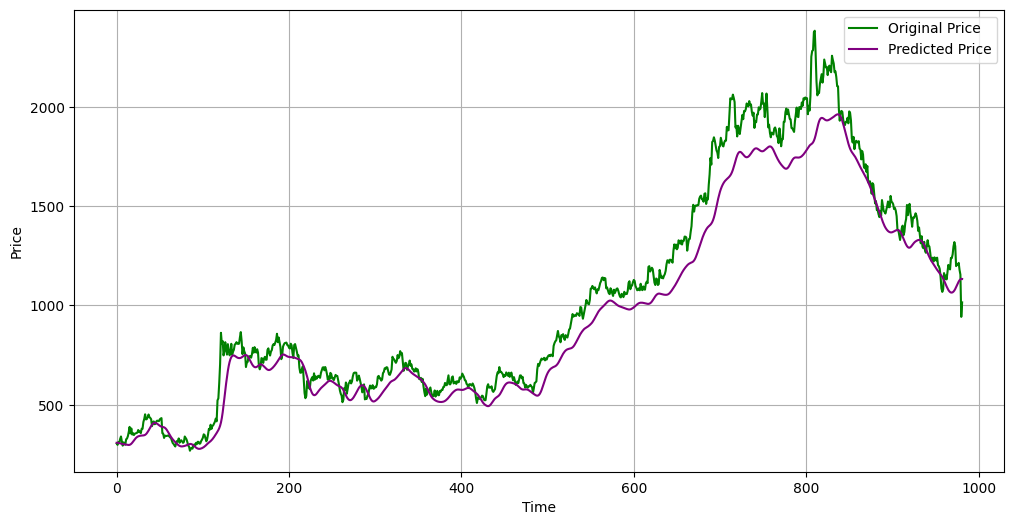

In [ ]:
import matplotlib.pyplot as plt

#  y_test and y_pred are  data arrays
plt.figure(figsize=(12, 6))

# Custom colors: Green for Original Price and Purple for Predicted Price
plt.plot(y_test, 'g', label="Original Price")  # Green
plt.plot(y_pred, '#800080', label="Predicted Price")  # Purple using hex code

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Calculation of mean absolute error and R2 Score

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


Mean absolute error on test set: 9.42%


In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: 0.9443638444912731


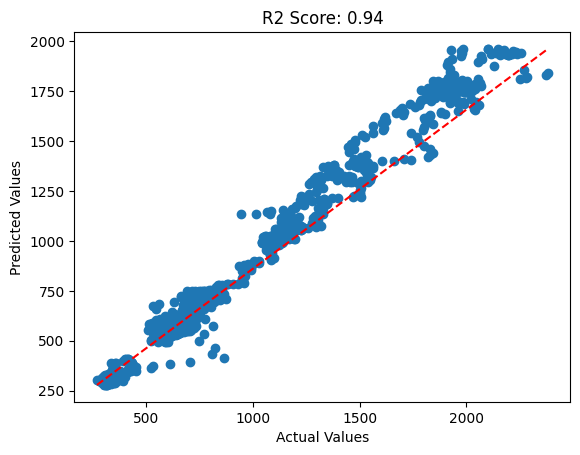

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()